#Done By:
#Name: Md.Rafi  ,ID:2020-1-60-078
#Name: Md Ripon Al Mamun ,ID:2021-2-60-083
#Name: Mehzabin Mahi ,ID:2021-1-60-055


# Download Dataset

In [ ]:
!gdown --id 1h2rLtIQssxiH1uqRrM5kANk-T2NfbNmq

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1h2rLtIQssxiH1uqRrM5kANk-T2NfbNmq
To: /content/Medicaldataset.csv
100% 52.4k/52.4k [00:00<00:00, 74.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import  t, ttest_ind, ttest_rel
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load Dataset Data preparation and Feature engineering



In [ ]:
df=pd.read_csv("/content/Medicaldataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


In [ ]:
df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [ ]:
df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
df.tail()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1
1318,51,1,94,157,79,134.0,50.89,1.770,1


In [ ]:
df["Result"].unique()

array(['negative', 'positive'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

CV = LabelEncoder()

df['Result'] = CV.fit_transform(df['Result'])

df.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [ ]:
df.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


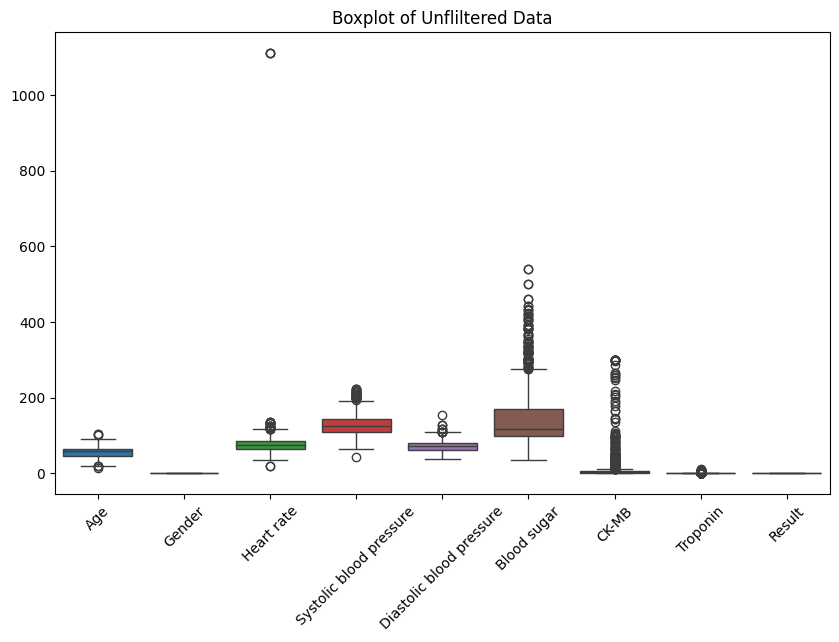

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title("Boxplot of Unfliltered Data")
plt.xticks(rotation=45)
plt.show()

In [ ]:
data=df.copy()
# Deriving categorical bins for age and BMI
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior'])


# Encode new categorical features
data['Age Group'] = LabelEncoder().fit_transform(data['Age Group'])
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age Group
0,64,1,66,160,83,160.0,1.80,0.012,0,2
1,21,1,94,98,46,296.0,6.75,1.060,1,4
2,55,1,64,160,77,270.0,1.99,0.003,0,2
3,64,1,70,120,55,270.0,13.87,0.122,1,2
4,55,1,64,112,65,300.0,1.08,0.003,0,2


In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(data)
data['outlier_pred'] = outlier_pred

In [ ]:
data2=data.loc[data['outlier_pred']==-1]
data2

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result,Age Group,outlier_pred
1,21,1,94,98,46,296.0,6.75,1.060,1,4,-1
6,32,0,40,179,68,102.0,0.71,0.003,0,4,-1
7,63,1,60,214,82,87.0,300.00,2.370,1,2,-1
12,64,1,60,199,99,92.0,3.43,5.370,1,2,-1
21,48,1,135,98,60,100.0,94.79,0.004,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
1294,50,0,79,92,55,415.0,16.95,0.005,1,0,-1
1302,40,1,57,208,40,108.0,2.11,0.003,0,0,-1
1310,70,0,80,135,75,351.0,2.21,10.000,1,3,-1
1313,86,0,40,179,68,147.0,5.22,0.011,0,3,-1


In [ ]:
data2=data.loc[data['outlier_pred']==1]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 0 to 1318
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1138 non-null   int64  
 1   Gender                    1138 non-null   int64  
 2   Heart rate                1138 non-null   int64  
 3   Systolic blood pressure   1138 non-null   int64  
 4   Diastolic blood pressure  1138 non-null   int64  
 5   Blood sugar               1138 non-null   float64
 6   CK-MB                     1138 non-null   float64
 7   Troponin                  1138 non-null   float64
 8   Result                    1138 non-null   int64  
 9   Age Group                 1138 non-null   int64  
 10  outlier_pred              1138 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 106.7 KB


In [ ]:
data2 = data2.drop('outlier_pred',axis = 1)

In [ ]:
data2=data2.drop('Age Group',axis = 1)
filtered=data2.copy()

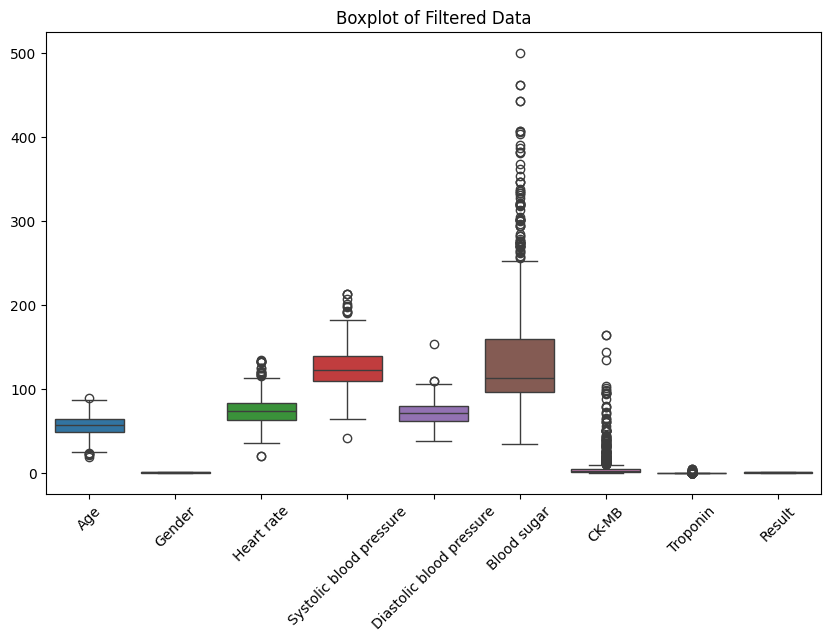

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(filtered)
plt.title("Boxplot of Filtered Data")
plt.xticks(rotation=45)
plt.show()

In [ ]:
filtered.corr()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
Age,1.000000,-0.138610,0.007138,0.020864,0.002052,0.032130,-0.000117,0.060753,0.225007
Gender,-0.138610,1.000000,0.013977,0.024181,-0.012117,0.049970,0.033282,0.133284,0.107076
Heart rate,0.007138,0.013977,1.000000,-0.029987,0.101467,0.002386,0.017140,0.017530,0.008607
Systolic blood pressure,0.020864,0.024181,-0.029987,1.000000,0.560877,0.003961,-0.025722,0.042770,-0.026844
Diastolic blood pressure,0.002052,-0.012117,0.101467,0.560877,1.000000,-0.019349,-0.024064,0.061725,-0.010547
Blood sugar,0.032130,0.049970,0.002386,0.003961,-0.019349,1.000000,-0.040489,0.013663,-0.018514
CK-MB,-0.000117,0.033282,0.017140,-0.025722,-0.024064,-0.040489,1.000000,-0.042245,0.247884
Troponin,0.060753,0.133284,0.017530,0.042770,0.061725,0.013663,-0.042245,1.000000,0.303981
Result,0.225007,0.107076,0.008607,-0.026844,-0.010547,-0.018514,0.247884,0.303981,1.000000


<Axes: >

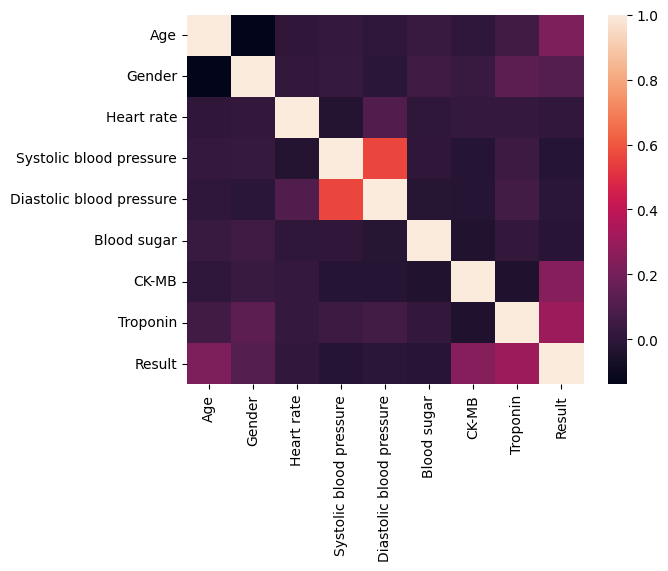

In [ ]:
sns.heatmap(filtered.corr())

#Statistical Hyposthesis Testing

Null Hypothesis (H0):The mean heart rate of individuals who experienced a heart attack (Result = 1) is equal to the mean heart rate of individuals who did not experience a heart attack (Result = 0).
Alternative Hypothesis (Ha): The mean heart rate of individuals who experienced a heart attack (Result = 1) is not equal to the mean heart rate of individuals who did not experience a heart attack (Result = 0).

In [ ]:
def z_test_two_pop(sample_mean1, sample_mean2, known_variance1, known_variance2, sample_size1, sample_size2):
    z_score = (sample_mean1 - sample_mean2) / np.sqrt(known_variance1/sample_size1 + known_variance2/sample_size2)
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
    return z_score, p_value

sample_mean1 = filtered[filtered['Result'] == 1]['Heart rate'].mean()
sample_mean2 = filtered[filtered['Result'] == 0]['Heart rate'].mean()
known_variance1 = filtered[filtered['Result'] == 1]['Heart rate'].var()
known_variance2 = filtered[filtered['Result'] == 0]['Heart rate'].var()
sample_size1 = filtered[filtered['Result'] == 1]['Heart rate'].count()
sample_size2 = filtered[filtered['Result'] == 0]['Heart rate'].count()

z_score,p_value=z_test_two_pop(sample_mean1,
               sample_mean2,
               known_variance1,
               known_variance2,
               sample_size1,
               sample_size2)
z_score,p_value

print("z_score:", z_score)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
  print("Since p_value ", p_value,"is less than alpha ",alpha,"\nWe reject Null Hypothesis")
else:
  print("Since p_value ", p_value,"is greater than alpha ",alpha,"\nWe fail to reject Null Hypothesis")

z_score: 0.29297533065939707
p-value: 0.7695410080278022
Since p_value  0.7695410080278022 is greater than alpha  0.05 
We fail to reject Null Hypothesis


Null Hypothesis (Ho): there is no difference between the means of the systolic blood pressure in individuals who experienced a heart attack and those who did not.


Alternative Hypothesis (Ha): there is significant difference between the means of the systolic blood pressure in individuals who experienced a heart attack and those who did not.

In [ ]:
#T-test
def t_test_equal_variances(sample1, sample2):
    t_score, p_value = ttest_ind(sample1, sample2, equal_var=True)
    return t_score, p_value

sample1 = filtered[filtered['Result'] == 1]['Systolic blood pressure']
sample2 = filtered[filtered['Result'] == 0]['Systolic blood pressure']

t_score, p_value = t_test_equal_variances(sample1, sample2)
print(f"Independent two-sample t-test: t-score={t_score}, p-value={p_value}")


alpha = 0.05
if p_value < alpha:
  print("Since p_value ", p_value,"is less than alpha ",alpha,"\nWe reject Null Hypothesis")
else:
  print("Since p_value ", p_value,"is greater than alpha ",alpha,"\nWe fail to reject Null Hypothesis")

Independent two-sample t-test: t-score=-0.9051051722257994, p-value=0.3656015858534353
Since p_value  0.3656015858534353 is greater than alpha  0.05 
We fail to reject Null Hypothesis



Null Hypothesis (H0): There is no association between gender and the occurrence of a heart attack Result.
Alternative Hypothesis (Ha): There is an association between gender and the occurrence of a heart attack Result.

In [ ]:
#Chi-square:
observed = pd.crosstab(filtered['Gender'], filtered['Result'])
chi2, p_value, dof, expected = chi2_contingency(observed)
print("Chi-Square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

alpha = 0.05
if p_value < alpha:
    print("\n\nSince p_value ", p_value,"is less than alpha ",alpha,"We  reject ")
else:
    print("\n\nSince p_value ", p_value,"is greater than alpha ",alpha,"We fail to Reject")


Chi-Square statistic: 12.580511773513647
p-value: 0.0003897899796634691
Degrees of Freedom: 1
Expected Frequencies:
 [[141.30843585 221.69156415]
 [301.69156415 473.30843585]]


Since p_value  0.0003897899796634691 is less than alpha  0.05 We  reject 


Null Hypothesis (H0): There is no linear relationship between systolic blood pressure and diastolic blood pressure.


Alternative Hypothesis (Ha): There is a linear relationship between systolic blood pressure and diastolic blood pressure.

In [ ]:
# Correcting the column name for the independent variable
X = filtered[['Systolic blood pressure']]  # Independent variable
y = filtered['Diastolic blood pressure']  # Dependent variable

# Add a constant to the independent variable to include the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())
p_value = model.pvalues[1]

# Interpretation
alpha = 0.05  # Significance level

if p_value < alpha:
    print("\n We reject the null hypothesis. There is a significant linear relationship between systolic blood pressure and diastolic blood pressure.")
else:
    print("We accept the null hypothesis. There is no significant linear relationship between systolic blood pressure and diastolic blood pressure.")

                               OLS Regression Results                               
Dep. Variable:     Diastolic blood pressure   R-squared:                       0.315
Model:                                  OLS   Adj. R-squared:                  0.314
Method:                       Least Squares   F-statistic:                     521.4
Date:                      Thu, 30 May 2024   Prob (F-statistic):           2.80e-95
Time:                              15:18:50   Log-Likelihood:                -4292.9
No. Observations:                      1138   AIC:                             8590.
Df Residuals:                          1136   BIC:                             8600.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

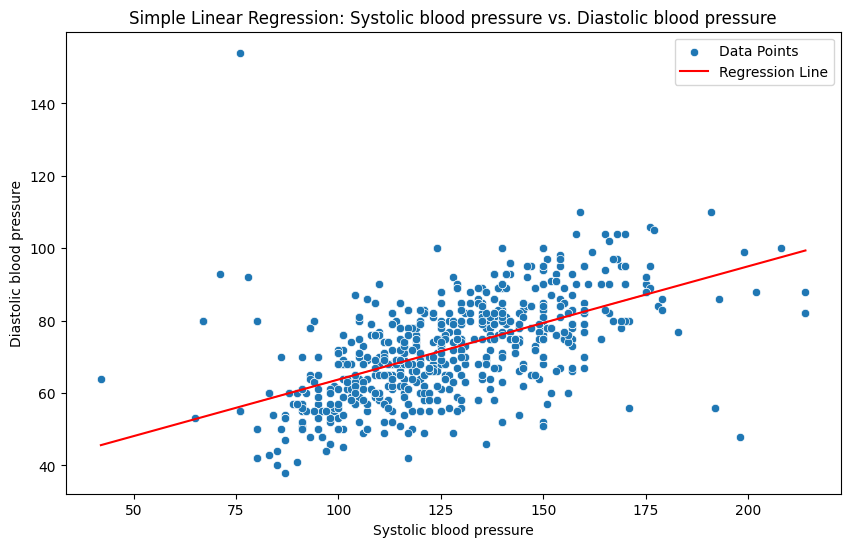

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered['Systolic blood pressure'], y=y, label='Data Points')
sns.lineplot(x=filtered['Systolic blood pressure'], y=model.predict(X), color='red', label='Regression Line')
plt.xlabel('Systolic blood pressure')
plt.ylabel('Diastolic blood pressure')
plt.title('Simple Linear Regression: Systolic blood pressure vs. Diastolic blood pressure')
plt.legend()
plt.show()

(Ho):There is a no significant interaction effect between blood sugar levels and CK-MB levels on heart attack outcomes.
(Ha):There is a significant interaction effect between blood sugar levels and CK-MB levels on heart attack outcomes.

In [ ]:
#Anova test
A= filtered['Blood sugar']
B = filtered['CK-MB']
C = filtered['Result']

data = pd.DataFrame()

data['A'] = A
data['B'] = B
data['C'] = C

model = ols('C ~ A + B + A:B ', data=data).fit()
aov_table = anova_lm(model,type=2)
print(aov_table.round(4))

if aov_table.loc['A:B', 'PR(>F)'] < alpha:
    print("Reject the null hypothesis for the interaction . There is a significant interaction effect between Blood Sugar and CK-MB on the result.")
else:
    print("Accept the null hypothesis for the interaction . There is no significant interaction effect between Blood Sugar and CK-MB on the result.")

              df    sum_sq  mean_sq        F  PR(>F)
A            1.0    0.0927   0.0927   0.4158  0.5192
B            1.0   16.5511  16.5511  74.2120  0.0000
A:B          1.0    0.9964   0.9964   4.4675  0.0348
Residual  1134.0  252.9090   0.2230      NaN     NaN
Reject the null hypothesis for the interaction . There is a significant interaction effect between Blood Sugar and CK-MB on the result.


In [ ]:
# Normalize or scale continuous variables
scaler = MinMaxScaler()  # or use StandardScaler() for models like SVM
continuous_columns = [col for col in data2.columns if data2[col].dtype in ['float64', 'int64']]
data2[continuous_columns] = scaler.fit_transform(data2[continuous_columns])

In [ ]:
y = data2['Result']
X = data2.drop('Result',axis=1)

#Model Train

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=300)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Evaluation function to print the metrics
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"Model: {model_name}")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")


# Evaluating all models
evaluate_model(y_test, y_pred_rf, 'Random Forest')
evaluate_model(y_test, y_pred_svm, 'SVM')
evaluate_model(y_test, y_pred_nn, 'Neural Network')
evaluate_model(y_test, y_pred_xgb, 'XGBoost')
evaluate_model(y_test, y_pred_lr, 'Logistic Regression')


Model: Random Forest
[[ 82   0]
 [  2 144]]
Random Forest Performance:
Accuracy: 0.9912
Precision: 0.9881
Recall: 0.9932
F1-Score: 0.9905

Model: SVM
[[ 43  39]
 [ 22 124]]
SVM Performance:
Accuracy: 0.7325
Precision: 0.7111
Recall: 0.6869
F1-Score: 0.6938

Model: Neural Network
[[ 74   8]
 [ 28 118]]
Neural Network Performance:
Accuracy: 0.8421
Precision: 0.8310
Recall: 0.8553
F1-Score: 0.8360

Model: XGBoost
[[ 81   1]
 [  2 144]]
XGBoost Performance:
Accuracy: 0.9868
Precision: 0.9845
Recall: 0.9871
F1-Score: 0.9858

Model: Logistic Regression
[[ 41  41]
 [ 19 127]]
Logistic Regression Performance:
Accuracy: 0.7368
Precision: 0.7196
Recall: 0.6849
F1-Score: 0.6932



#learning curve for choosen model

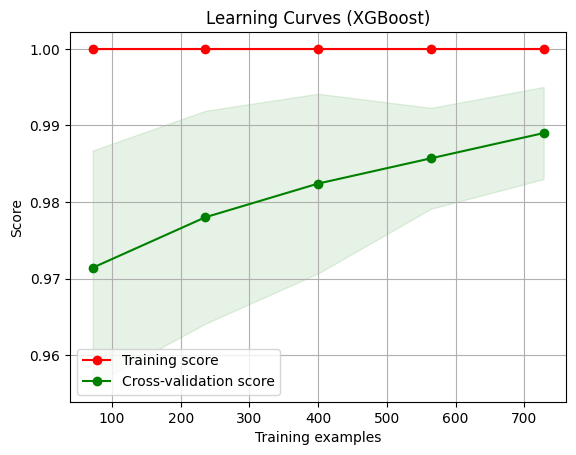

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Set the parameters for the learning curve
title = "Learning Curves (XGBoost)"
cv = 5  # Cross-validation strategy
n_jobs = -1  # Use all processors for parallelism

# Plot learning curve for XGBoost
plot_learning_curve(xgb_model, title, X_train, y_train, cv=cv, n_jobs=n_jobs)
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 6.3 MB/s eta 0:00:00


#Shap

Here is SHAP (SHapley Additive exPlanations) force_plot To understand effective the impact of each feature on a model's prediction for a single observation.

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

In [ ]:
# Train the model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

shap.initjs()
# Create the SHAP explainer and calculate SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_train)

# Visualize the first prediction's explanation
shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0,:], X_train.iloc[0,:])


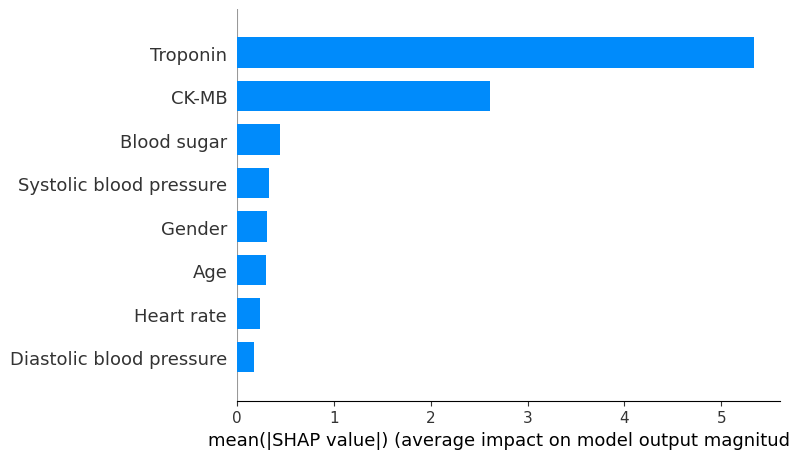

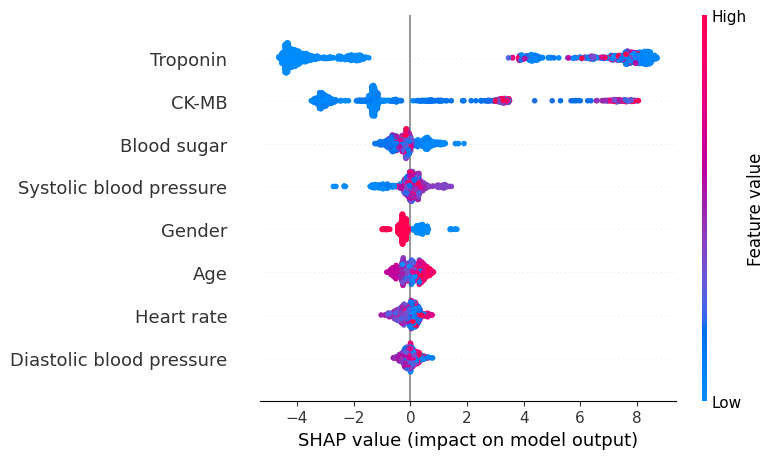

In [ ]:
# Assuming X_train and y_train are already defined and preprocessed
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, verbosity=1, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Create the SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

#  SHAP summary plot (beeswarm plot) to see the distribution
shap.summary_plot(shap_values, X_train, plot_type='dot')




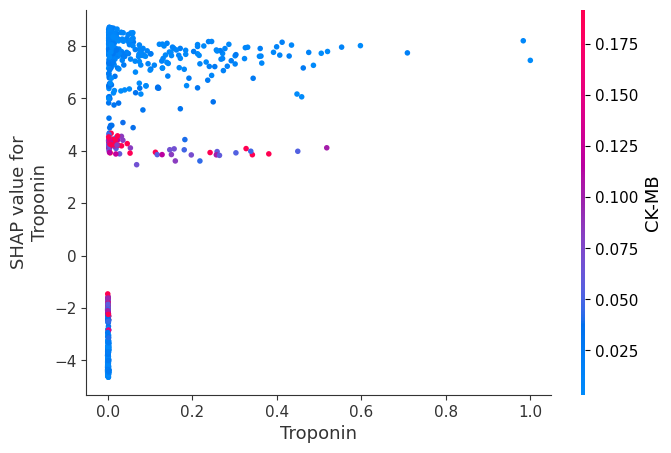

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt



# SHAP explainer and calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP dependence plot for a specific feature

feature_name = 'Troponin'

# feature for coloring to show interactions;
interaction_index = 'auto'  # Set to 'auto'

shap.dependence_plot(ind=feature_name, shap_values=shap_values, features=X_train, interaction_index=interaction_index)
# Each point on the plot represents a single datapoint in the dataset.
# The x-axis shows the value of the feature, and the y-axis shows the SHAP value for that feature.
# The color represents the value of the interacting feature, providing insight into how two features interact to impact the model output.


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=100e577ce64b7a10fcf83838aeeb738750bfe37bac995a9d8ce7f71ad56ade96
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# LIME Plot

*   Positive Contributions (Green Bars): Features that push the model’s prediction in the positive direction (towards the predicted class). The length of the bar indicates the strength of the contribution.
*  Negative Contributions (Red Bars): Features that push the model’s prediction in the negative direction (away from the predicted class). Again, the length of the bar reflects the magnitude of the impact.



In [ ]:
import xgboost as xgb
from lime import lime_tabular
import numpy as np



# Create a LIME explainer object
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Negative', 'Positive'],
    mode='classification'
)

# Select the instance to explain
i = 1
instance = X_train.iloc[i]

# Generate explanations
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_model.predict_proba
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

# This generates an HTML output showing the contribution of each feature to the prediction of the selected instance.